## IDS/ACM/CS 158: Fundamentals of Statistical Learning
### PS1, Problem 3: The Curse of Dimensionality: Simulation
> Name: Li, Michael
 
> Email address: mlli@caltech.edu

Notes:
Please use python 3.6

You are required to properly comment and organize your code.

* Helper functions (add/remove part label according to the specific question requirements)

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

%matplotlib inline

def generate_data(p):
    """
    p - dimension of x
    
    Returns dataset of dimension p according to problem statement
    """
    N = 10**3
    x = np.random.normal(size=(N, p))
    y = np.array([sum(i)+np.random.normal() for i in x])[...,None]
    return np.concatenate((x,y), axis=1)

def average_error(ys, y_preds):
    """
    ys - vector of real outputs
    y_preds - vector of predicted outputs
    
    Returns L2 loss between vectors
    """
    return np.mean((ys - y_preds)**2)

def knn_regression(K, D, X):
    """
    K - number of neighbors
    D - training data consisting of pairs of p-dimensional vectors and outputs
    X - a column p-vector that represents a new input
    
    Returns the K-NN regression of X using D
    """
    train_x = D[:,:-1]
    train_y = D[:,-1]
    
    # find distances to X and sort points in D by that
    dists = np.sqrt(np.sum((train_x - np.matlib.repmat(X, len(train_x), 1))**2, axis=1))
    inds = dists.argsort()
    
    # return the mean of the outputs of the first K observations
    return np.mean(train_y[inds][:K])

def linreg_regression(D, X):
    """
    D - training data consisting of pairs of p-dimensional vectors and output
    X - a column p-vector that represents a new input
    
    Returns the linear regression of X using D
    """

    x = D[:,:-1]
    y = D[:,-1]
    
    # add bias term to training data
    bias = np.matlib.repmat(1, len(x), 1)
    x = np.concatenate((bias, x), axis=1)
    
    # calculate beta
    intermediate = np.matmul(x.transpose(), x)
    inverse_intermediate = np.linalg.inv(np.array(intermediate))
    pseudo_x = np.matmul(inverse_intermediate, x.transpose())
    
    beta = np.matmul(pseudo_x, y)
    
    # apply beta weight to X
    return np.matmul(np.insert(X, 0, 1), beta)

def knn_vs_linear_reg(train_data, test_data):
    """
    train_filename - filename of training data to load
    test_filename - filename of test data to load
    dataset - number of dataset
    
    Prints Results for KNN vs LinReg
    """
    K = 5
    test_x = test_data[:,:-1]
    test_y = test_data[:,-1]
    
    # run KNN and Linear Regression on all points in test dataset
    knn = [knn_regression(K, train_data, test_x[i]) for i in range(len(test_x))]
    lr = [linreg_regression(train_data, test_x[i]) for i in range(len(test_x))]
    
    # compute the L2 loss of both models and return
    Err_knn = average_error(test_y, np.array(knn))
    Err_lr = average_error(test_y, np.array(lr))
    
    return Err_knn, Err_lr

* <b>ps1problem3</b>

In [8]:
lr_errs = []
knn_errs = []

# generate datasets for p dimensions
train_data = [generate_data(p) for p in range(1,101)]
test_data = [generate_data(p) for p in range(1,101)]

# get the L2 loss of both models for every p
for i in range(len(test_data)):
    Err_knn, Err_lr = knn_vs_linear_reg(train_data[i], test_data[i])
    lr_errs.append(Err_lr)
    knn_errs.append(Err_knn)

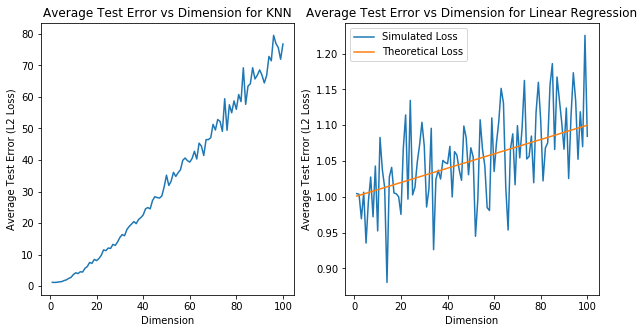

In [9]:
dims = np.arange(1, 101)
theoretical_linreg_err = [1+(1/10**3)*p for p in dims]

plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(121)
plt.plot(dims, knn_errs)
plt.xlabel('Dimension')
plt.ylabel('Average Test Error (L2 Loss)')
plt.title('Average Test Error vs Dimension for KNN')

plt.subplot(122)
plt.plot(dims, lr_errs, label='Simulated Loss')
plt.plot(dims, theoretical_linreg_err, label='Theoretical Loss')
plt.xlabel('Dimension')
plt.ylabel('Average Test Error (L2 Loss)')
plt.title('Average Test Error vs Dimension for Linear Regression')
plt.legend()
plt.show()